In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,ttest_1samp,ttest_ind,ttest_rel,f_oneway,chisquare,chi2_contingency
from scipy.stats import kstest,levene,kruskal,shapiro
from scipy.stats import mannwhitneyu

import warnings 
warnings.filterwarnings('ignore')

In [2]:
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

# Problem Statement

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Yulu has recently suffered considerable dips in its revenues.They want to understand the factors affecting the demand for these shared electric cycles in the Indian market.<br><br>
The company wants to know:
1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands

# Exploratory Data Analysis

### Observations on shape of data, data types of all the attributes

In [3]:
df = pd.read_csv('Yulu.csv')

In [4]:
df.shape

(10886, 12)

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
'season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count'

('season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count')

In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<b>Observations</b>
- Most of the days humidity is around 47-77
- Temprature is around 14-26 degree Celcius
- Temprature feels like is around 16.6-31 degree Celcius
- Count of Casual users can vary from 4-49 per day
- Count of registered users can vary from 36-222 per day
- Count of total users varies from 42-284 users per day

In [9]:
df.datetime = pd.to_datetime(df.datetime)

df['date'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

In [10]:
cols_list =['season','holiday','workingday']

In [11]:
days_df = df[['date','season','holiday','workingday']].drop_duplicates(keep = 'first')
df['windspeed_bins'] = pd.cut(df['windspeed'],bins = [-0.0000001,10,20,30,40,50,60],labels = ['0-10','10-20','20-30','30-40','40-50','50-60'])


for i in cols_list:
    print(bold_text(i.upper()+':'))
    print(f'Value Counts of {i} columns is:\n{days_df[i].value_counts()}\n\n')

print(bold_text('weather'.upper()+':'))
print(f'Value Counts of weather columns is:\n{df["weather"].value_counts()}\n\n')


print(bold_text('humidity'.upper()+':'))
print(f'Value Counts of humidity columns is:\n{df["humidity"].value_counts()}\n\n')

print(bold_text('windspeed'.upper()+':'))
print(f'Value Counts of windspeed columns is:\n{df["windspeed_bins"].value_counts()}\n\n')

SEASON:
Value Counts of season columns is:
season
1    114
2    114
3    114
4    114
Name: count, dtype: int64


HOLIDAY:
Value Counts of holiday columns is:
holiday
0    443
1     13
Name: count, dtype: int64


WORKINGDAY:
Value Counts of workingday columns is:
workingday
1    311
0    145
Name: count, dtype: int64


WEATHER:
Value Counts of weather columns is:
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


HUMIDITY:
Value Counts of humidity columns is:
humidity
88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: count, Length: 89, dtype: int64


WINDSPEED:
Value Counts of windspeed columns is:
windspeed_bins
10-20    5052
0-10     4339
20-30    1068
30-40     387
40-50      36
50-60       4
Name: count, dtype: int64




In [12]:
print("The dataset was recorded over",bold_text(str(df['date'].nunique())),"days.")

The dataset was recorded over 456 days.


In [13]:
df.isna().sum() 

datetime          0
season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
casual            0
registered        0
count             0
date              0
month             0
hour              0
windspeed_bins    0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
new_df = df.groupby('date')['date'].count()
new_df.index[new_df<24]

Index([2011-01-02, 2011-01-03, 2011-01-04, 2011-01-05, 2011-01-06, 2011-01-07,
       2011-01-11, 2011-01-12, 2011-01-14, 2011-01-18, 2011-01-19, 2011-02-01,
       2011-02-03, 2011-02-04, 2011-02-09, 2011-02-10, 2011-02-11, 2011-02-13,
       2011-02-15, 2011-02-16, 2011-03-06, 2011-03-07, 2011-03-10, 2011-03-11,
       2011-03-13, 2011-03-14, 2011-03-15, 2011-03-16, 2011-03-18, 2011-04-11,
       2011-09-06, 2011-09-08, 2011-09-12, 2011-10-19, 2012-01-02, 2012-01-10,
       2012-01-17, 2012-02-06, 2012-03-11, 2012-04-02, 2012-04-11, 2012-11-08],
      dtype='object', name='date')

## Univariate Analysis

In [16]:
cols_list =['season','holiday','workingday','weather']

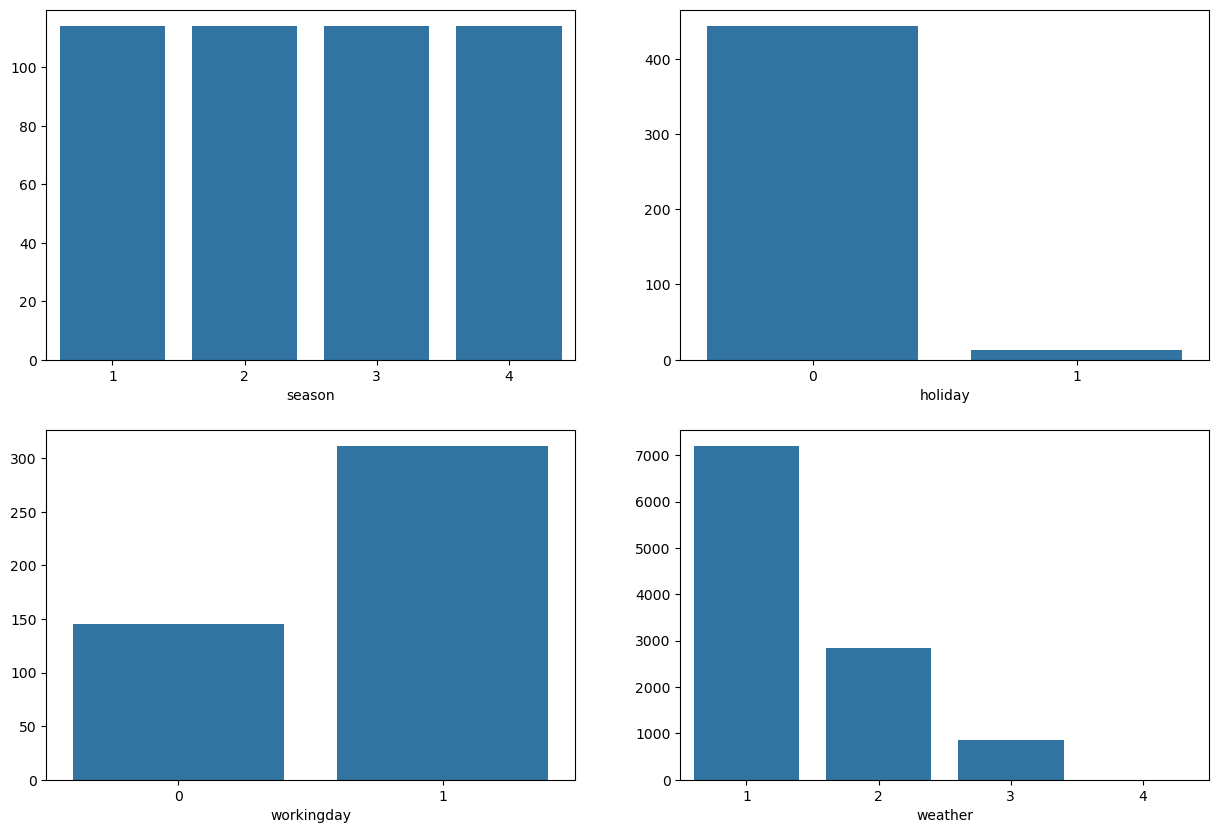

In [17]:
plt.figure(figsize=(15,5*2))
plt.subplot(2,2,1)
sns.countplot(data = days_df,x = 'season')

plt.ylabel('')

plt.subplot(2,2,2)
sns.countplot(data = days_df,x = 'holiday')
plt.ylabel('')

plt.subplot(2,2,3)
sns.countplot(data = days_df,x = 'workingday')
plt.ylabel('')

plt.subplot(2,2,4)
sns.countplot(data = df,x = 'weather')
plt.ylabel('')

plt.show()

### Observations: 
1. We have dataset which is equally divided among all seasons
2. This dataset has very few holiday records. 
3. Most of the records are of workingday. 
4. Most of the records are of weather1 i.e. Clear Sky

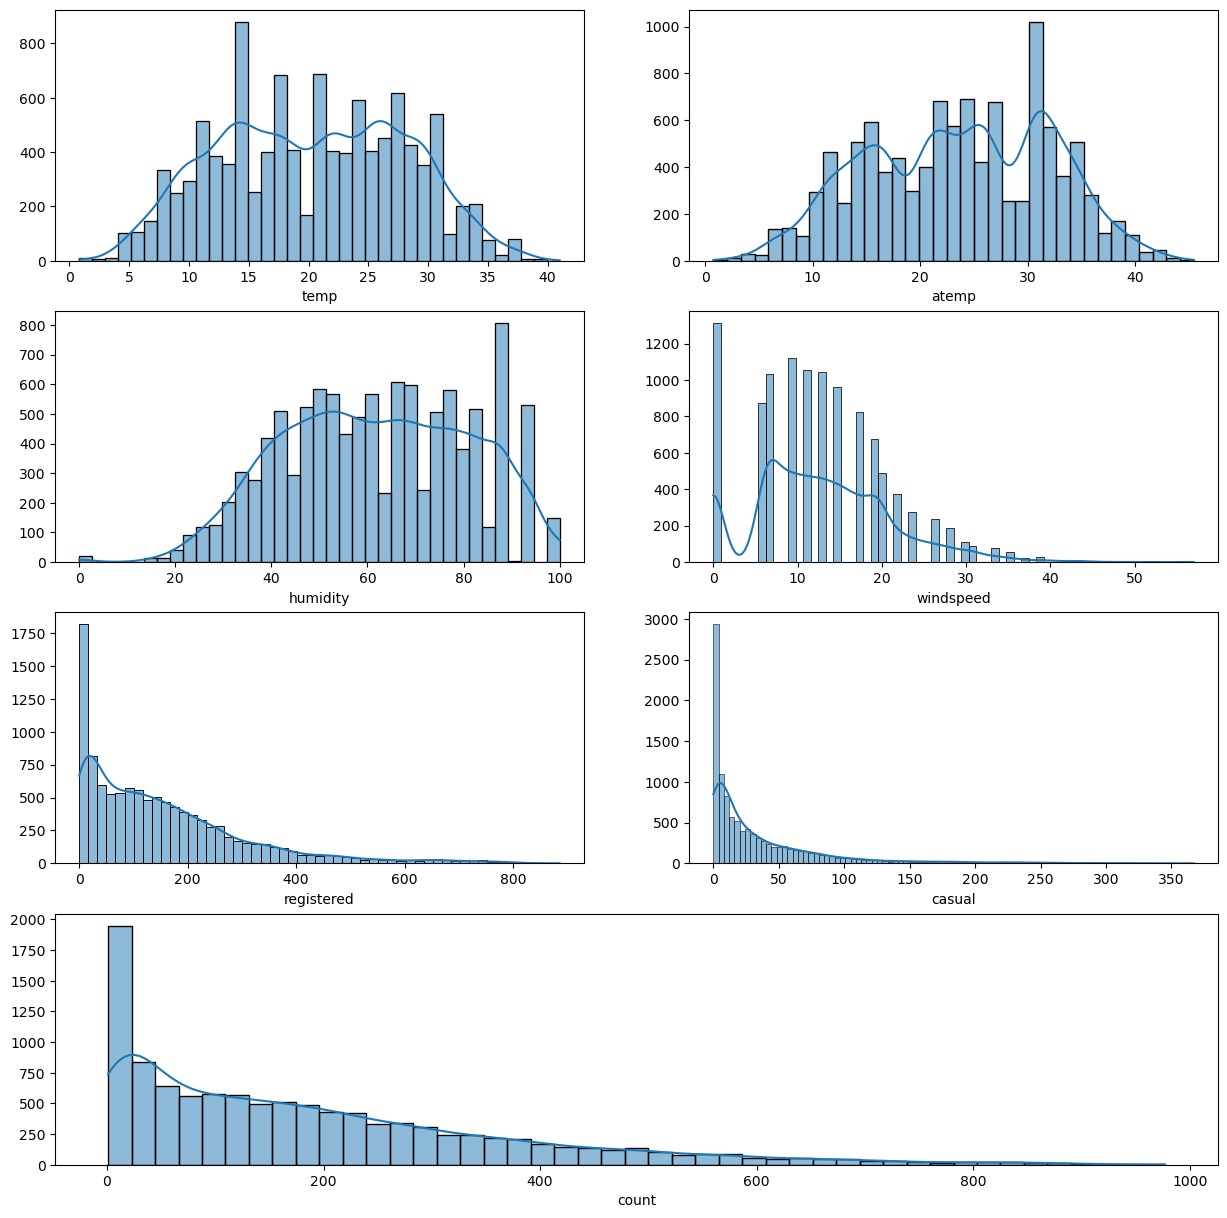

In [18]:
plt.figure(figsize=(15,5*3))

plt.subplot(4,2,1)
sns.histplot(data = df,x = 'temp',kde=True)
plt.ylabel('')

plt.subplot(4,2,2)
sns.histplot(data = df,x = 'atemp',kde=True)
plt.ylabel('')

plt.subplot(4,2,3)
sns.histplot(data = df,x = 'humidity',kde=True)
plt.ylabel('')

plt.subplot(4,2,4)
sns.histplot(data = df,x = 'windspeed',kde=True)
plt.ylabel('')

plt.subplot(4,2,5)
sns.histplot(data = df,x = 'registered',kde=True)
plt.ylabel('')

plt.subplot(4,2,6)
sns.histplot(data = df,x = 'casual',kde=True)
plt.ylabel('')

plt.subplot(4,1,4)
sns.histplot(data = df,x = 'count',kde=True)
plt.ylabel('')

plt.show()

### Observations
1. Registered, Casual and Count are Right Skewed, which seems valid as there's less probability of having high number of rides

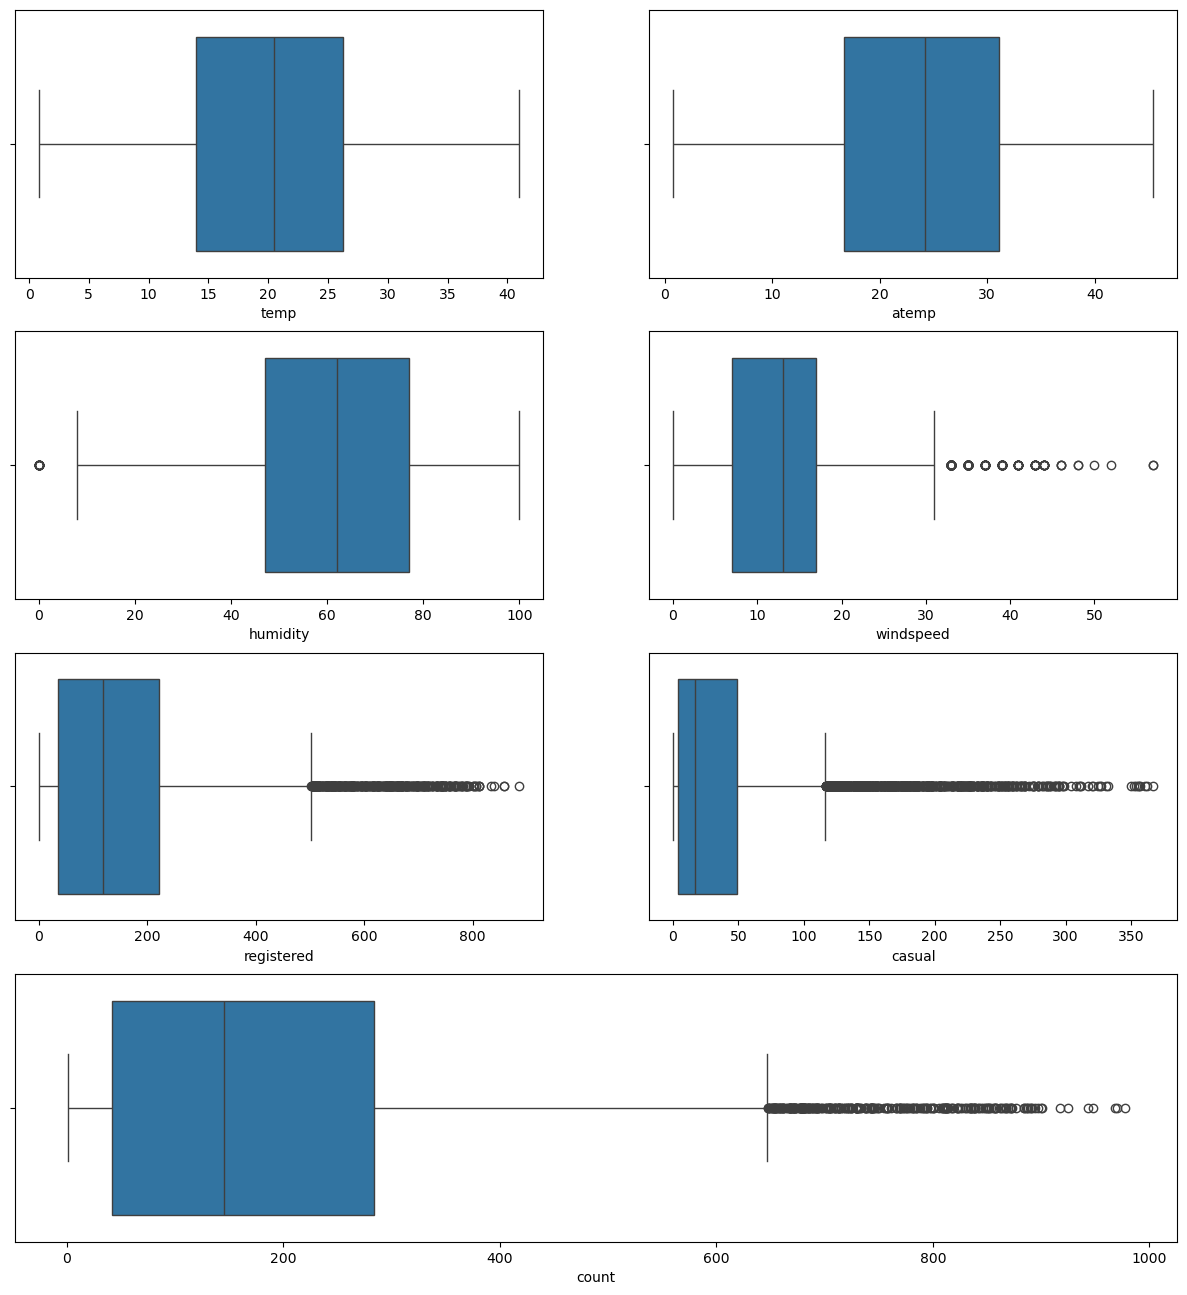

In [19]:
plt.figure(figsize=(15,8*2))

plt.subplot(4,2,1)
sns.boxplot(data = df,x = 'temp',)

plt.subplot(4,2,2)
sns.boxplot(data = df,x = 'atemp')

plt.subplot(4,2,3)
sns.boxplot(data = df,x = 'humidity')

plt.subplot(4,2,4)
sns.boxplot(data = df,x = 'windspeed')

plt.subplot(4,2,5)
sns.boxplot(data = df,x = 'registered')

plt.subplot(4,2,6)
sns.boxplot(data = df,x = 'casual')

plt.subplot(4,1,4)
sns.boxplot(data = df,x = 'count')
plt.ylabel('')

plt.show()

### Observations 
1. We can see some outliers for casual, windspeed and registered.

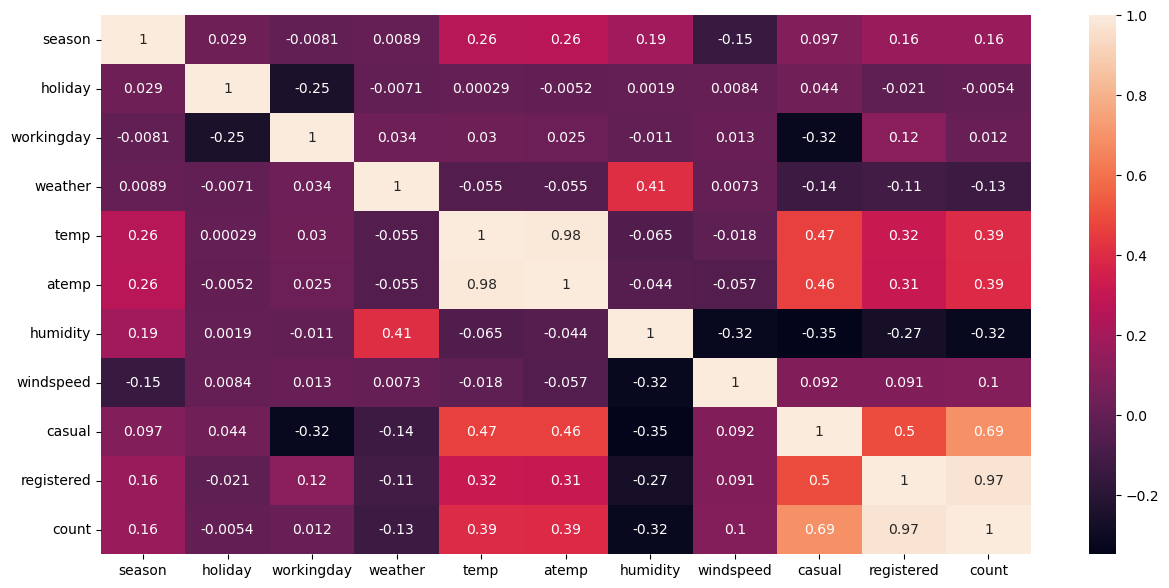

In [20]:
plt.figure(figsize = (15,7))
sns.heatmap(df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']].corr(),annot = True)
plt.show()

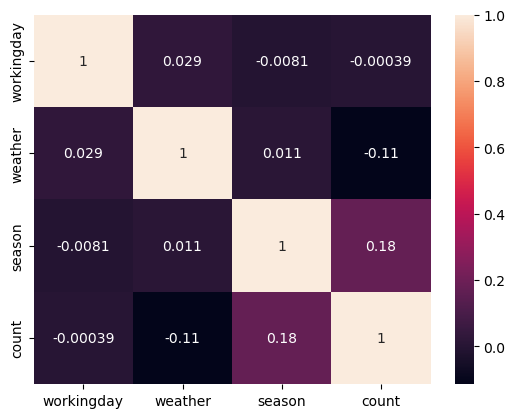

In [21]:
sns.heatmap(df[['workingday','weather','season','count']].corr(method = 'spearman'),annot = True)
plt.show()

### Observations 
1. Count is highly correlated with registered.
2. Count is correlated with casual.
3. Count is lowly correlated with temp and atemp.
4. Count is negatively low correlated with weather and humidity. 
5. Count is not correlated(independent) of holiday, workingday, windspeed.
6. Temp and Atemp are highly correlated.

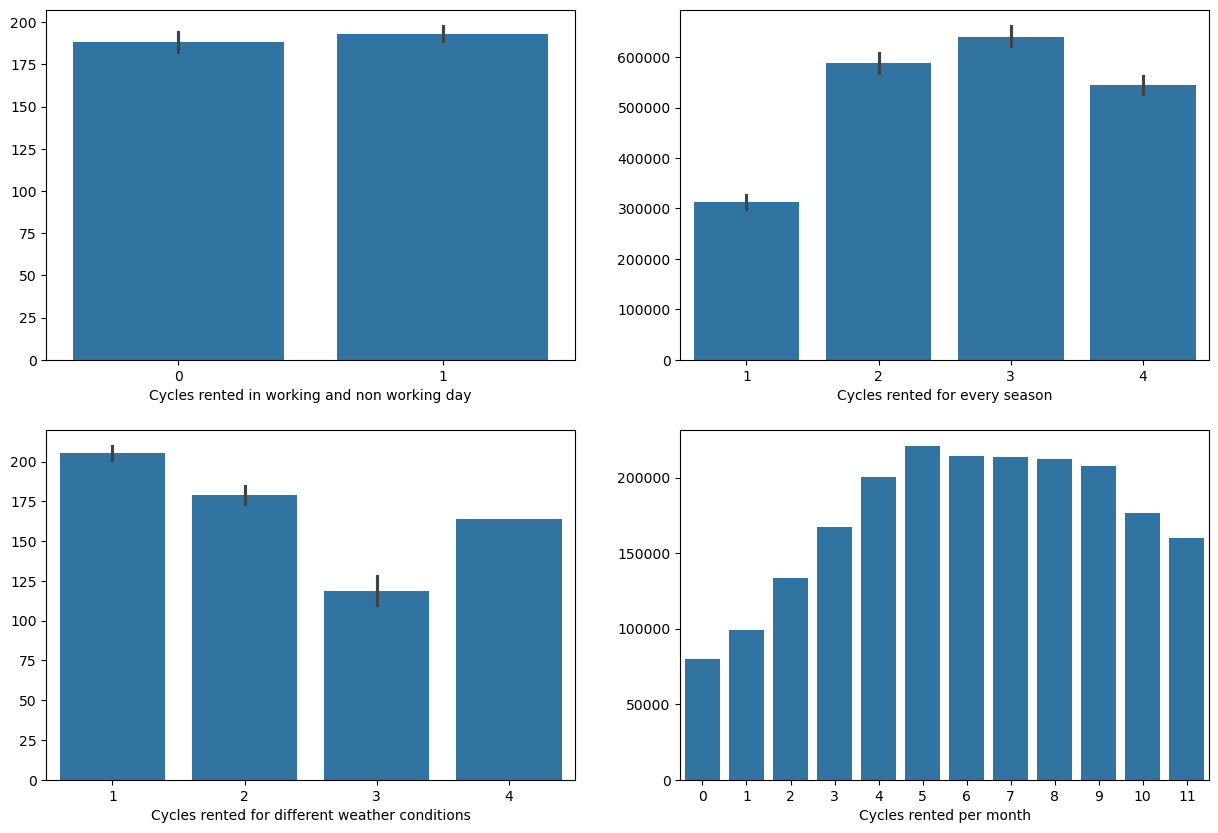

In [22]:
month_count = df.groupby('month')['count'].sum().reset_index(drop = True)

plt.figure(figsize = (15,5*2))

plt.subplot(2,2,1)
sns.barplot(data =df, x = 'workingday', y = 'count')
plt.ylabel('')
plt.xlabel('Cycles rented in working and non working day')

plt.subplot(2,2,2)
sns.barplot(data =df, x = 'season', y = 'count',estimator='sum')
plt.ylabel('')
plt.xlabel("Cycles rented for every season")

plt.subplot(2,2,3)
sns.barplot(data =df, x = 'weather', y = 'count',)
plt.ylabel('')
plt.xlabel('Cycles rented for different weather conditions')

plt.subplot(2,2,4)
sns.barplot(x = month_count.index, y = month_count)
plt.ylabel('')
plt.xlabel('Cycles rented per month')

plt.show()

### Observations  
1. Most cycles were rented in weather 1
2. Most cycles were rented season 3. 
3. We can observe some seasonality, most of the cycles were rented from 4th month to 9th month

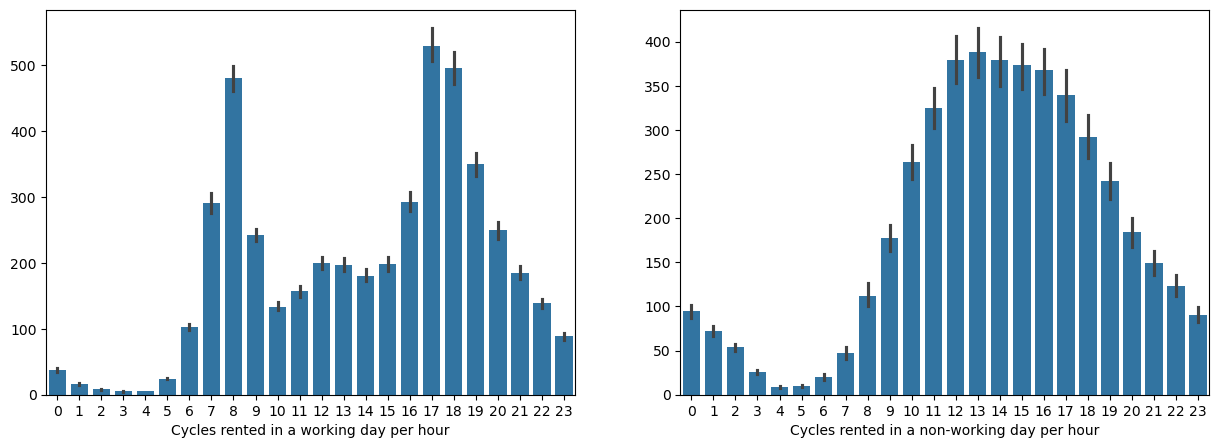

In [23]:
working = df[df['workingday'] == 1]
nonworking = df[df['workingday'] == 0]

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.barplot(data = working, x = 'hour',y='count')
plt.xlabel('Cycles rented in a working day per hour')
plt.ylabel('')

plt.subplot(1,2,2)
sns.barplot(data = nonworking, x = 'hour',y='count')
plt.xlabel('Cycles rented in a non-working day per hour')
plt.ylabel('')

plt.show()

### Observations 
1. In a workingday most of the cycles were rented in hour 8,17 and 18.
2. In a non-working day most cycless were rened between 12th to 16th hour


In [24]:
cycles_count = df.groupby('date')['count'].sum().reset_index(drop = True)

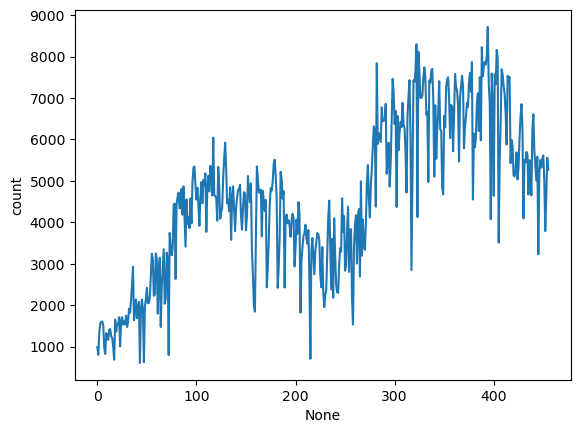

In [25]:
sns.lineplot(x = cycles_count.index,y = cycles_count);

### Observation 
1. It can be observed that no of cycles rented are growing.

# Hypothesis Testing

## Working Day has effect on number of electric cycles rented 

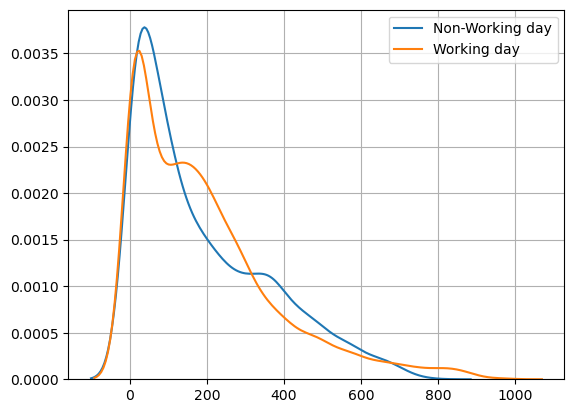

In [26]:
sns.kdeplot(df.loc[df['workingday'] == 0,'count'],label = 'Non-Working day')
sns.kdeplot(df.loc[df['workingday'] == 1,'count'],label = 'Working day')

plt.ylabel('')
plt.xlabel('')
plt.legend()
plt.grid()
plt.show()

**From the graph itself, it's clearly evident that both working and non working day are not Gaussian. To ensure this Shapiro's test will be performed**

In [27]:
working = df.loc[df['workingday'] == 0,'count']
non_working = df.loc[df['workingday'] == 1,'count']

In [28]:
print("P_value for Shapiro's test working day is",shapiro(working)[1])
print("P_value for Shapiro's test non working day is",shapiro(non_working)[1])

P_value for Shapiro's test working day is 4.203895392974451e-45
P_value for Shapiro's test non working day is 0.0


### Observation:
1. Both working and non working day are not of Gaussian Distribution, `Mann Whitney U` Test would be more apt compared to `Ttest Indpendent`.

In [29]:
Ho = 'The average number of cycles rented for working day is same as non working day'
Ha = 'The average number of cycles rented for working day is not same as non working day'

alpha = 0.05
t_stat,p_value = ttest_ind(working,non_working)
print("p_value:",p_value)
if p_value < alpha: 
    print("Reject Ho, Interpretation:",bold_text(Ha))
else:
    print("Fail to Reject Ho, Interpretation:",bold_text(Ho))

p_value: 0.22644804226361348
Fail to Reject Ho, Interpretation: The average number of cycles rented for working day is same as non working day


In [30]:
Ho = 'There is no difference in the distributions of the number of cycles rented between working day and non working day.'
Ha = 'There is a statistically significant difference in the distributions of the number of cycles rented between working and non working day.'
working = df.loc[df['workingday'] == 0,'count']
non_working = df.loc[df['workingday'] == 1,'count']
alpha = 0.05
t_stat,p_value = mannwhitneyu(working,non_working)
print("p_value:",p_value)
if p_value < alpha: 
    print("Reject Ho, Interpretation:",bold_text(Ha))
else:
    print("Fail to Reject Ho, Interpretation:",bold_text(Ho))

p_value: 0.9679139953914079
Fail to Reject Ho, Interpretation: There is no difference in the distributions of the number of cycles rented between working day and non working day.


### Conclusion:
1. There is no statistically significant difference in cyles rented between working and non-working day. 

## No. of cycles rented similar or different in different seasons 

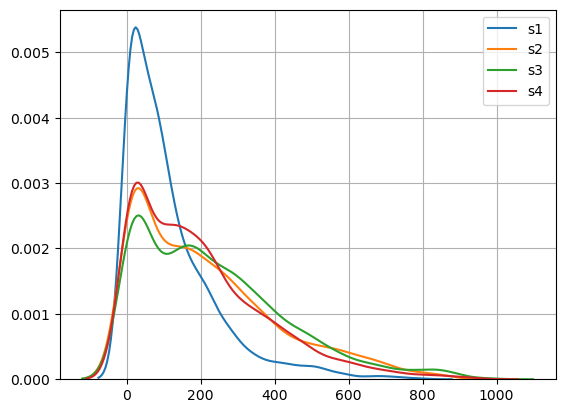

In [31]:
s1 =  df.loc[df['season'] == 1,'count']
s2 =  df.loc[df['season'] == 2,'count']
s3 =  df.loc[df['season'] == 3,'count']
s4 =  df.loc[df['season'] == 4,'count']

sns.kdeplot(df.loc[df['season'] == 1,'count'],label = 's1')
sns.kdeplot(df.loc[df['season'] == 2,'count'],label = 's2')
sns.kdeplot(df.loc[df['season'] == 3,'count'],label = 's3')
sns.kdeplot(df.loc[df['season'] == 4,'count'],label = 's4')

plt.ylabel('')
plt.xlabel('')
plt.legend()
plt.grid()
plt.show()

**We can apply ANOVA test here, but there are few assumptions for `ANOVA` which is as follows:**
1. **The distributions must be `Gaussian`.**
2. **The `distributions should be indpendent`, which means probability of one distribution doesn't affect the other.**
3. **The distributions should have `equal variance`.**

**If any of the above condition fails then we'll proceed with `Kruskal's Test`**

### Gaussian Test 

- Null Hypothesis would be -- Distribution is Gaussian.
- Alternate Hypothesis would be -- Distribution is not Gaussian.

If pvalue less than alpha, i.e. 0.05 considered here, then We will reject Null Hypothesis, else fail to reject null hypothesis.

In [32]:
print("P_value for Shapiro's test season1 is",shapiro(s1)[1])
print("P_value for Shapiro's test season2 is",shapiro(s2)[1])
print("P_value for Shapiro's test season3 is",shapiro(s3)[1])
print("P_value for Shapiro's test season4 is",shapiro(s4)[1])

P_value for Shapiro's test season1 is 0.0
P_value for Shapiro's test season2 is 6.039093315091269e-39
P_value for Shapiro's test season3 is 1.043458045587339e-36
P_value for Shapiro's test season4 is 1.1301682309549298e-39


### Equal Variance Test 

- Null Hypothesis would be -- Distributions have equal variance.
- Alternate Hypothesis would be -- Distributions donot have equal variance.

If pvalue less than alpha, i.e. 0.05 considered here, then We will reject Null Hypothesis, else fail to reject null hypothesis.

In [33]:
print("P_value for Levene's test: ", levene(s1,s2,s3,s4)[1])

P_value for Levene's test:  1.0147116860043298e-118


### Observation and Conclusion:
- All the distributions do not have equal variance nor are Gaussian.
- From the observations, more `appropriate test would be Kruskal's Test not ANOVA`.

**Just to compare ANOVA and Kruskal, we'll perform both the test**

In [34]:
Ho = 'The average number of cycles rented for every season is same'
Ha = 'Atleast one season has different average number rented cycles'
alpha = 0.05
f_stat,p_value = f_oneway(s1,s2,s3,s4)
print("p_value:",p_value)
if p_value < alpha: 
    print("Reject Ho, Interpretation:",bold_text(Ha))
else:
    print("Fail to Reject Ho, Interpretation:",bold_text(Ho))

p_value: 6.164843386499654e-149
Reject Ho, Interpretation: Atleast one season has different average number rented cycles


In [35]:
alpha = 0.05
k_stat,p_value = kruskal(s1,s2,s3,s4)
print("p_value:",p_value)
if p_value < alpha: 
    print("Reject Ho, Interpretation:",bold_text(Ha))
else:
    print("Fail to Reject Ho, Interpretation:",bold_text(Ho))

p_value: 2.479008372608633e-151
Reject Ho, Interpretation: Atleast one season has different average number rented cycles


**Let's dive a bit further and we can find out which seasons have same average number of cycles.<br><br>Since all the seasons are of not Gaussian distribution, it would be more appropriate to use `Mann Whitney U` test, rather than `Ttest independent`. However, both the tests will be conducted and the results will be compared.**

In [36]:
for i in range(1,5):
    for j in range(i+1,5):
        dynamic_string = f"tstat, p_value = ttest_ind(s{i},s{j})\nprint('Ttest stat and pvalue for s{i} and s{j} are,','tstat =',tstat,'and p_value =',p_value)"
        exec(dynamic_string)


Ttest stat and pvalue for s1 and s2 are, tstat = -22.41673852194779 and p_value = 1.6578587340400095e-106
Ttest stat and pvalue for s1 and s3 are, tstat = -26.262602569974415 and p_value = 3.403850435531097e-143
Ttest stat and pvalue for s1 and s4 are, tstat = -19.763761227758852 and p_value = 5.236417429066782e-84
Ttest stat and pvalue for s2 and s3 are, tstat = -3.6407918229052068 and p_value = 0.00027431561172498644
Ttest stat and pvalue for s2 and s4 are, tstat = 3.2507544346007022 and p_value = 0.001157968169413171
Ttest stat and pvalue for s3 and s4 are, tstat = 6.980360925184712 and p_value = 3.294359667247495e-12


In [37]:
for i in range(1,5):
    for j in range(i+1,5):
        dynamic_string = f"ustat, p_value = mannwhitneyu(s{i},s{j})\nprint('Man whitney U Test\\'s stat and pvalue for s{i} and s{j} are,','ustat =',ustat,'and p_value =',p_value)"
        exec(dynamic_string)


Man whitney U Test's stat and pvalue for s1 and s2 are, ustat = 2518569.5 and p_value = 5.0579767904700045e-89
Man whitney U Test's stat and pvalue for s1 and s3 are, ustat = 2272290.0 and p_value = 3.0899996139213672e-130
Man whitney U Test's stat and pvalue for s1 and s4 are, ustat = 2595047.0 and p_value = 5.515082495319044e-78
Man whitney U Test's stat and pvalue for s2 and s3 are, ustat = 3498667.5 and p_value = 5.2260049828014345e-05
Man whitney U Test's stat and pvalue for s2 and s4 are, ustat = 3875221.0 and p_value = 0.017042933306205856
Man whitney U Test's stat and pvalue for s3 and s4 are, ustat = 4123318.0 and p_value = 3.1866670900901714e-11


### Final Conclusion: 
1. Atleast one season has different average number rented cycles.
2. There is a statistically significant difference in the distributions of the number of cycles rented between all the seasons.

## No. of cycles rented similar or different in different weather

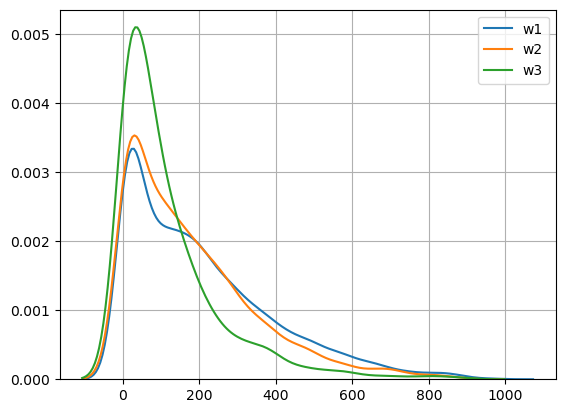

In [38]:
w1 =  df.loc[df['weather'] == 1,'count']
w2 =  df.loc[df['weather'] == 2,'count']
w3 =  df.loc[df['weather'] == 3,'count']
w4 =  df.loc[df['weather'] == 4,'count']

sns.kdeplot(df.loc[df['weather'] == 1,'count'],label = 'w1')
sns.kdeplot(df.loc[df['weather'] == 2,'count'],label = 'w2')
sns.kdeplot(df.loc[df['weather'] == 3,'count'],label = 'w3')
sns.kdeplot(df.loc[df['weather'] == 4,'count'],label = 'w4')

plt.ylabel('')
plt.xlabel('')
plt.legend()
plt.grid()
plt.show()

### Gaussian Test 

- Null Hypothesis would be -- Distribution is Gaussian.
- Alternate Hypothesis would be -- Distribution is not Gaussian.

If pvalue less than alpha, i.e. 0.05 considered here, then We will reject Null Hypothesis, else fail to reject null hypothesis.

In [39]:
print("P_value for Shapiro's test season1 is",shapiro(w1)[1])
print("P_value for Shapiro's test season2 is",shapiro(w2)[1])
print("P_value for Shapiro's test season3 is",shapiro(w3)[1])
# print("P_value for Shapiro's test season4 is",shapiro(w4)[1])

P_value for Shapiro's test season1 is 0.0
P_value for Shapiro's test season2 is 9.781063280987223e-43
P_value for Shapiro's test season3 is 3.876090133422781e-33


### Equal Variance Test 

- Null Hypothesis would be -- Distributions have equal variance.
- Alternate Hypothesis would be -- Distributions donot have equal variance.

If pvalue less than alpha, i.e. 0.05 considered here, then We will reject Null Hypothesis, else fail to reject null hypothesis.

In [40]:
print("P_value for Levene's test: ", levene(w1,w2,w3)[1])

P_value for Levene's test:  6.198278710731511e-36


### Observation and Conclusion:
- All the distributions do not have equal variance nor are Gaussian.
- From the observations, more `appropriate test would be Kruskal's Test not ANOVA`.
- As there's only one record for weather4, weather4 won't be included in the below tests.

**Just to compare ANOVA and Kruskal, we'll perform both the test**

In [41]:
Ho = 'The average number of rented cycles for every weather is same'
Ha = 'Atleast one weather has different average number of rented cycles'
alpha = 0.05
f_stat,p_value = f_oneway(w1,w2,w3)
print("p_value:",p_value)

if p_value < alpha: 
    print("Reject Ho, Interpretation:",bold_text(Ha))
else:
    print("Fail to Reject Ho, Interpretation:",bold_text(Ho))
    

p_value: 4.976448509904196e-43
Reject Ho, Interpretation: Atleast one weather has different average number of rented cycles


In [42]:
alpha = 0.05
k_stat,p_value = kruskal(w1,w2,w3)
print("p_value:",p_value)

if p_value < alpha: 
    print("Reject Ho, Interpretation:",bold_text(Ha))
else:
    print("Fail to Reject Ho, Interpretation:",bold_text(Ho))
    

p_value: 3.122066178659941e-45
Reject Ho, Interpretation: Atleast one weather has different average number of rented cycles


**As we performed ttest and mann whitney U test for each and every season. Same will be performed for different weather**

In [43]:
for i in range(1,4):
    for j in range(i+1,4):
        dynamic_string = f"tstat, p_value = ttest_ind(w{i},w{j})\nprint('Ttest stat and pvalue for w{i} and w{j} are,','tstat =',tstat,'and p_value =',p_value)"
        exec(dynamic_string)


Ttest stat and pvalue for w1 and w2 are, tstat = 6.488169251217751 and p_value = 9.098916216508542e-11
Ttest stat and pvalue for w1 and w3 are, tstat = 13.05352692528198 and p_value = 1.4918709771846276e-38
Ttest stat and pvalue for w2 and w3 are, tstat = 9.53048112515673 and p_value = 2.7459673190273642e-21


In [44]:
for i in range(1,4):
    for j in range(i+1,4):
        dynamic_string = f"ustat, p_value = mannwhitneyu(s{i},s{j})\nprint('Man whitney U Test\\'s stat and pvalue for s{i} and s{j} are,','ustat =',ustat,'and p_value =',p_value)"
        exec(dynamic_string)


Man whitney U Test's stat and pvalue for s1 and s2 are, ustat = 2518569.5 and p_value = 5.0579767904700045e-89
Man whitney U Test's stat and pvalue for s1 and s3 are, ustat = 2272290.0 and p_value = 3.0899996139213672e-130
Man whitney U Test's stat and pvalue for s2 and s3 are, ustat = 3498667.5 and p_value = 5.2260049828014345e-05


### Final Conclusion: 
1. Atleast one weather condition has different average number rented cycles.
2. There is a statistically significant difference in the distributions of the number of cycles rented between all the weather conditions.

## Weather is dependent on season

In [45]:
pd.crosstab(df['weather'],df['season'])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [46]:
Ho = 'Weather is independent on Season'
Ha = 'Weather is dependent on Season'
alpha = 0.05

chi_stat,p_value,*a = chi2_contingency(pd.crosstab(df['weather'],df['season']))
print("p_value:",p_value)

if p_value < alpha: 
    print("Reject Ho, Interpretation:",bold_text(Ha))
else:
    print("Fail to Reject Ho, Interpretation:",bold_text(Ho))

p_value: 1.5499250736864862e-07
Reject Ho, Interpretation: Weather is dependent on Season


### Conclusion 
1. Weather is dependent on season